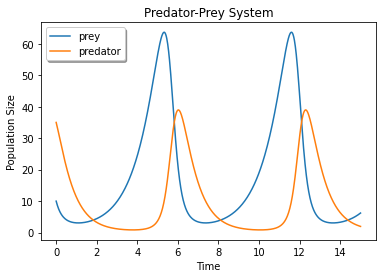

In [1]:
### INITIAL SIMULATION

#!python

## Model Setup
# import packages
from numpy import *
import pylab as p
from scipy import integrate
import matplotlib.pyplot as plt

# Definition of parameters
alpha = 1.0
beta = 0.1
gamma = 1.5
delta = 0.75
max_time = 15 # time span of integration

# Definition of the predator-prey system
def dZ_dt(Z,t,alpha,beta,gamma,delta):
    x,y = Z
    return array([ alpha*x -   beta*x*y ,
                  -gamma*y + delta*beta*x*y])

## Integrate
# Solve the ODE for initial conditions x0,y0
x0,y0 = (10, 35) # initials conditions: 10 prey and 35 predators
t = linspace(0, max_time, 1000)
z = integrate.odeint(dZ_dt,[x0,y0],t,args=(alpha,beta,gamma,delta)) # solve the ODE system to get population numbers

# Compute the solution between the time interval and plot
x,y= z.T
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(['prey', 'predator'], shadow=True)
plt.title('Predator-Prey System')
plt.show()

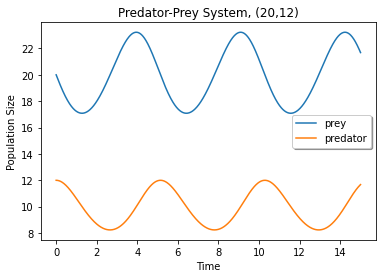

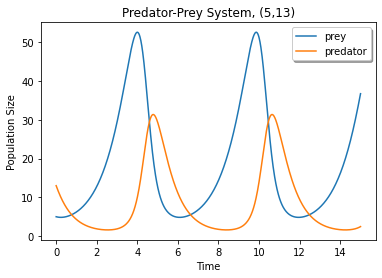

In [2]:
### INTERVENTION STRATEGIES
t = linspace(0, max_time, 1000)

# Change the values for x0(prey) and y0(predators)
x01,y01 = (20, 12) # adding 10 predators when x,y = (20,2)
x02,y02 = (5, 13)  # adding 10 predators awhen x,y = (5,3)

# Solve and plot
z = integrate.odeint(dZ_dt,[x01,y01],t,args=(alpha,beta,gamma,delta));x,y=z.T # solve the ODE system to get population numbers
plt.plot(t, x);plt.plot(t,y);plt.xlabel('Time');plt.ylabel('Population Size');plt.legend(['prey', 'predator'], shadow=True);plt.title('Predator-Prey System, (%.f,%.f)'%(x01,y01))
plt.show()
z = integrate.odeint(dZ_dt,[x02,y02],t,args=(alpha,beta,gamma,delta));x,y=z.T # solve the ODE system to get population numbers
plt.plot(t, x);plt.plot(t,y);plt.xlabel('Time');plt.ylabel('Population Size');plt.legend(['prey', 'predator'], shadow=True);plt.title('Predator-Prey System, (%.f,%.f)'%(x02,y02))
plt.show()

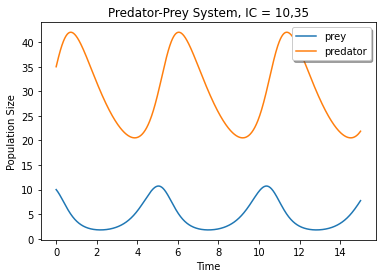

In [3]:
### DIFFERENT PARAMETER VALUES

# Change the values for the parameters
alpha = 3
beta = 0.1
gamma = 0.5
delta = 1
max_time = 15

# Initial conditions
x0,y0 = (10, 35) # initials conditions
t = linspace(0, max_time, 1000)

# Solve and plot
z = integrate.odeint(dZ_dt,[x0,y0],t,args=(alpha,beta,gamma,delta));x,y=z.T # solve the ODE system to get population numbers
plt.plot(t, x);plt.plot(t,y);plt.xlabel('Time');plt.ylabel('Population Size');plt.legend(['prey', 'predator'], shadow=True);plt.title('Predator-Prey System, IC = %.f,%.f'%(x0,y0))
plt.show()



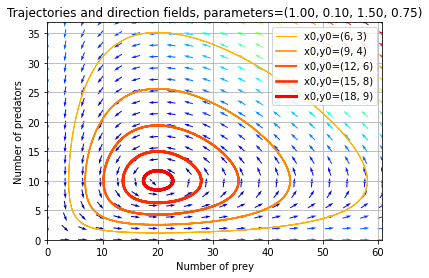

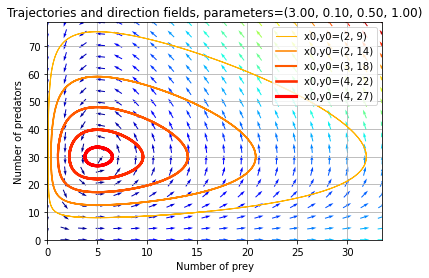

In [4]:
### PHASE DIAGRAMS
# parameter set 1 - PLAY AROUND WITH THESE VALUES
alpha1 = 1.0
beta1 = 0.1
gamma1 = 1.5
delta1 = 0.75
max_time1 = 15

# parameter set 2 = PLAY AROUND WITH THESE VALUES
alpha2 =3
beta2 = 0.1
gamma2 = 0.5
delta2 = 1
max_time2 = 15

Z_f0 = array([ 0. ,  0.]) # fixed point 1
Z_f1 = array([ gamma1/(delta1*beta1), alpha1/beta1]) # fixed point 2

values  = linspace(0.3, 0.9, 5)                          # position of Z0 between Z_f0 and Z_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory
f2 = p.figure()
#-------------------------------------------------------
# plot trajectories
t = linspace(0, max_time1, 1000)
for v, col in zip(values, vcolors):
    x0,y0 = v * Z_f1                               # starting point
    z = integrate.odeint(dZ_dt,[x0,y0],t,args=(alpha1,beta1,gamma1,delta1));x,y=z.T # solve the ODE system to get population numbers
    p.plot( x, y, lw=3.5*v, color=col, label='x0,y0=(%.f, %.f)' % ( x0, y0) )

# #-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1,DY1 = dZ_dt([X1, Y1],0,alpha1,beta1,gamma1,delta1) # compute growth rate on the gridt
# DX1 = DZ1[:,0]; DY1 = DZ1[]
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

# #-------------------------------------------------------
# # Drow direction fields, using matplotlib 's quiver function
# # I choose to plot normalized arrows and to use colors to give information on
# # the growth speed
p.title('Trajectories and direction fields, parameters=(%.2f, %.2f, %.2f, %.2f)' % (alpha1,beta1,gamma1,delta1))
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of prey')
p.ylabel('Number of predators')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)


### Repeat with the second set of parameteres


Z_f0 = array([ 0. ,  0.]) # fixed point 1
Z_f1 = array([ gamma2/(delta2*beta2), alpha2/beta2]) # fixed point 2

values  = linspace(0.3, 0.9, 5)                          # position of Z0 between Z_f0 and Z_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory
f3 = p.figure()
#-------------------------------------------------------
# plot trajectories
t = linspace(0, max_time2, 1000)
for v, col in zip(values, vcolors):
    x0,y0 = v * Z_f1                               # starting point
    z = integrate.odeint(dZ_dt,[x0,y0],t,args=(alpha2,beta2,gamma2,delta2));x,y=z.T # solve the ODE system to get population numbers
    p.plot( x, y, lw=3.5*v, color=col, label='x0,y0=(%.f, %.f)' % ( x0, y0) )

# #-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1,DY1 = dZ_dt([X1, Y1],0,alpha2,beta2,gamma2,delta2) # compute growth rate on the gridt
# DX1 = DZ1[:,0]; DY1 = DZ1[]
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

# #-------------------------------------------------------
# # Drow direction fields, using matplotlib 's quiver function
# # I choose to plot normalized arrows and to use colors to give information on
# # the growth speed
p.title('Trajectories and direction fields, parameters=(%.2f, %.2f, %.2f, %.2f)' % (alpha2,beta2,gamma2,delta2))
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of prey')
p.ylabel('Number of predators')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)


plt.show(f2,f3)
